<a id = "cell_executivesummary"></a>
## 1. Business understandings, problem, solution and recommendations

This report describes a machine learning approach for online gaming site Play Quest Conquer (PQC) to identify factors that influence ratings. The goal is to gain insights from the given data, build predictive models for relevant games, and provide optimal recommendations to improve user experience and performance. Years, age groups, and player profiles are tracked. Collaborative measures such as time between games and its relationship to viewership are also examined. Machine learning models are designed to predict average gameplay using factors such as game difficulty, popularity, and user satisfaction. Performance standards are evaluated and provide valuable information for the development of PQC and game support. Game measurement and user interaction. Additional information on data quality and correlation between variables is also provided.


<a id = "cell_exploration"></a>
## 2. Data understanding, preparation, explorations and visualisation



2.1 Mounting the drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


2.2 Importing the Libraries

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

2.3 Data Exploration

In [ ]:
#Loading the data
df = pd.read_csv('/content/PQC_data.csv')
df.head()
pqc_data = df.copy()

In [ ]:
# Checking for null values and data types of columns
print(df.isnull().sum())
df.dtypes

Game_ID                0
Game_Name              7
Released_Year          0
Game_Type              0
Age_Category           0
Min_Players            0
Max_Players            0
Average_Complexity     0
Complexity_Raters      0
Average_Play_Time      0
Owner_Number           0
Trader_Number          0
HighInterest_Number    0
Interest_Number        0
Rater_Number           0
Comment_Number         0
Average_Rating         0
dtype: int64


,0
Game_ID,int64
Game_Name,object
Released_Year,int64
Game_Type,object
Age_Category,object
Min_Players,int64
Max_Players,int64
Average_Complexity,float64
Complexity_Raters,int64
Average_Play_Time,int64


In [ ]:
df.describe()

,Game_ID,Released_Year,Min_Players,Max_Players,Average_Complexity,Complexity_Raters,Average_Play_Time,Owner_Number,Trader_Number,HighInterest_Number,Interest_Number,Rater_Number,Comment_Number,Average_Rating
count,24813.000000,24813.000000,24813.000000,24813.000000,24813.000000,24813.000000,24813.000000,24813.000000,24813.000000,24813.000000,24813.000000,24813.000000,24813.000000,24813.000000
mean,30936.022932,1997.201306,2.061984,5.321364,1.985790,42.554306,55.214041,674.204006,23.187281,32.460847,111.182767,426.814251,125.987345,6.214560
std,18959.061557,126.087629,0.674214,7.076917,0.825714,190.105819,42.587838,2453.510070,61.473750,95.826761,378.753127,1881.192532,457.626686,1.512151
min,7074.000000,-99.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,14652.000000,2000.000000,2.000000,4.000000,1.230800,1.000000,25.000000,17.000000,0.000000,0.000000,2.000000,7.000000,4.000000,5.555560
50%,24721.000000,2007.000000,2.000000,4.000000,2.000000,4.000000,45.000000,77.000000,3.000000,3.000000,9.000000,27.000000,13.000000,6.427540
75%,47162.000000,2012.000000,2.000000,6.000000,2.500000,16.000000,60.000000,376.000000,17.000000,18.000000,49.000000,142.000000,57.000000,7.146720
max,71822.000000,2017.000000,9.000000,99.000000,5.000000,5996.000000,180.000000,73188.000000,1395.000000,1586.000000,6402.000000,53680.000000,11798.000000,10.000000


In [ ]:
# What are the unique values in our categorial features such as Game_Type, Age_Category , Released_Year
print('Game_Type -')
print(df['Game_Type'].unique())
print('Age_Category -')
print(df['Age_Category'].unique())
print('Released_Year -')
print(df['Released_Year'].unique())

Game_Type -
['BaseGame' 'PremiumGame']
Age_Category -
['12 to under 18' 'under 5' '5 to under 12' '18 to under 21' '21 and over']
Released_Year -
[2010 1998 2007 2016 1988 2012 2005 1992 2000 2015 1983 2002 2003 2008
 1991 2004 2013 2009 1982 2001 2014 2011 1985 1993 2006 1999 1995 1996
 1994 1984 1986 1997 1989 1987 1980 1981  -99 1990 2017]


2.4 Data Cleaning

In [ ]:
#Creating a new dataframe df_cleaned
df_cleaned = pd.read_csv('PQC_data.csv')

In [ ]:
#Data cleaning for Game_Name as it have 7 null values
#Filling null values as 'Unknown' as it is not included in our feature.
df_cleaned['Game_Name'].fillna('Unknown', inplace=True)

In [ ]:
#Data Cleaning for Released_Year as it have some values as -99
#Replacing them with the meadian_year
median_year = df_cleaned['Released_Year'].median()
df_cleaned['Released_Year'] = df_cleaned['Released_Year'].replace(-99, median_year)

In [ ]:
#Data Cleaning for Min_Players and Max_players
#Some of the values are 0, replacing them with the meadian players

invalid_players = df_cleaned[(df_cleaned['Min_Players'] == 0) | (df_cleaned['Max_Players'] == 0)]

df_cleaned['Min_Players'].replace(0, df_cleaned['Min_Players'].median(), inplace=True)
df_cleaned['Max_Players'].replace(0, df_cleaned['Max_Players'].median(), inplace=True)


2.5 Data Visualisation

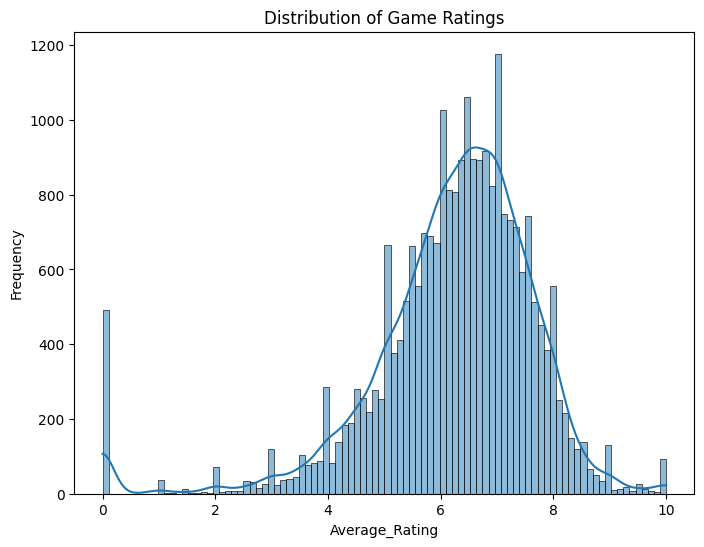

In [ ]:
#PLot of Distribution of game ratings
plt.figure(figsize=(8, 6))
sns.histplot(df_cleaned['Average_Rating'],  kde=True)
plt.title('Distribution of Game Ratings')
plt.xlabel('Average_Rating')
plt.ylabel('Frequency')
plt.show()

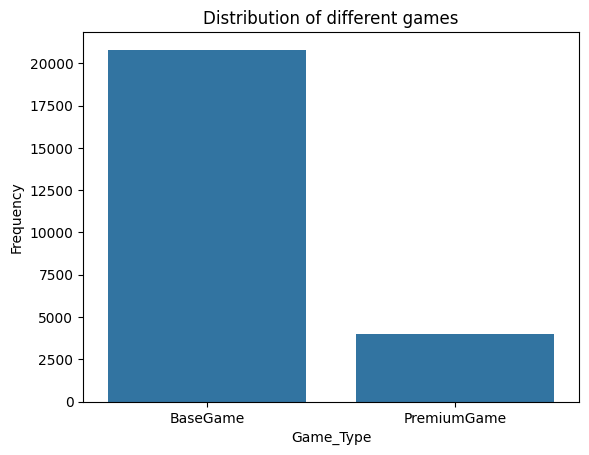

In [ ]:
#Plot of frequency of different games
sns.countplot(data = df_cleaned, x = 'Game_Type')
plt.title('Distribution of different games')
plt.xlabel('Game_Type')
plt.ylabel('Frequency')
plt.show()

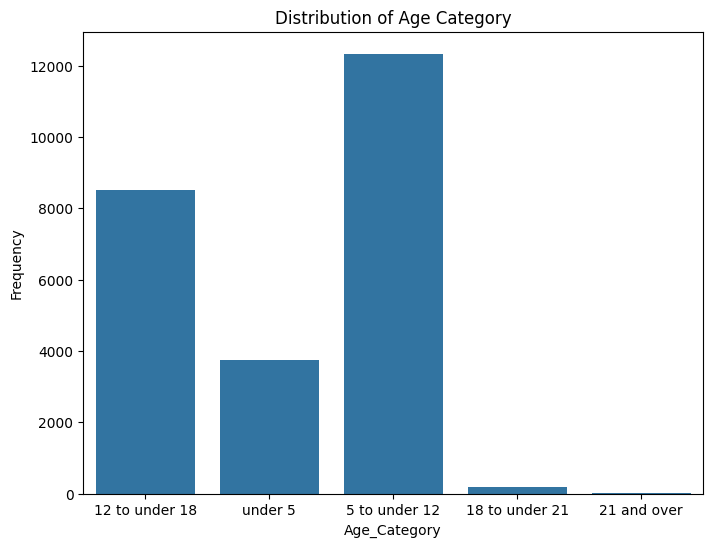

In [ ]:
#Plot of frequency of Age_Category
plt.figure(figsize=(8, 6))
sns.countplot(data = df_cleaned, x = 'Age_Category')
plt.title('Distribution of Age Category')
plt.xlabel('Age_Category')
plt.ylabel('Frequency')
plt.show()

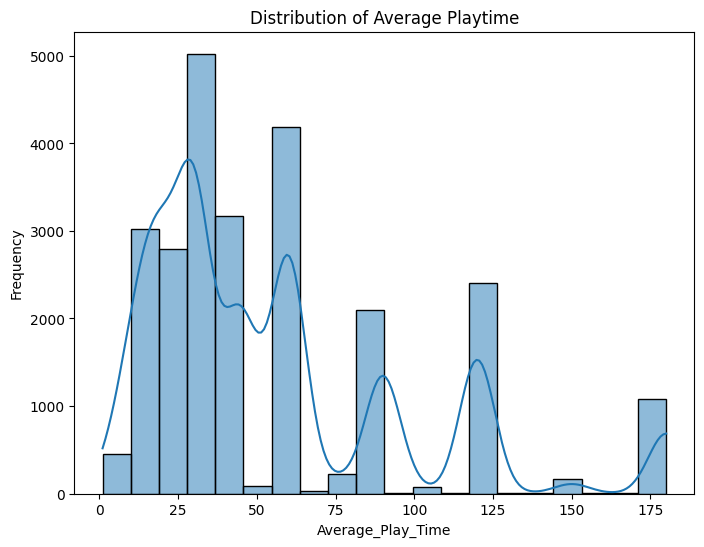

In [ ]:
#Plot of frequency of average play time
plt.figure(figsize=(8, 6))
sns.histplot(df_cleaned['Average_Play_Time'],bins = 20, kde=True)
plt.title('Distribution of Average Playtime')
plt.xlabel('Average_Play_Time')
plt.ylabel('Frequency')
plt.show()


Correlation between Average Play Time and Average Rating: 0.2175149897218227


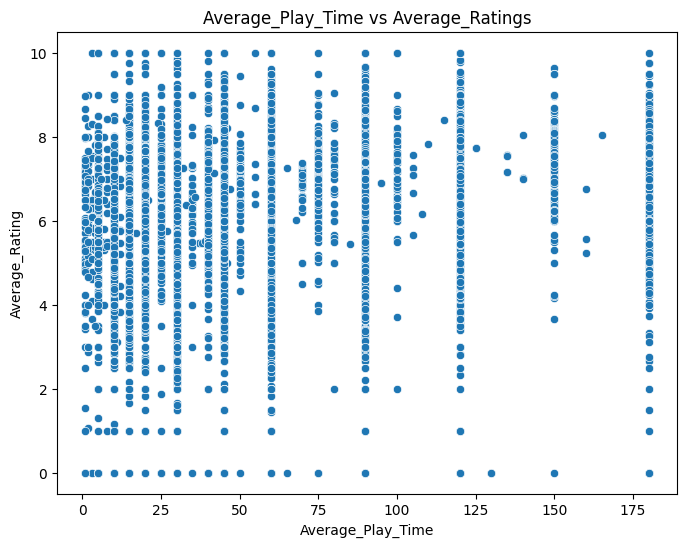

In [ ]:
#Plot of play time vs ratings
plt.figure(figsize=(8, 6))
sns.scatterplot(data = df_cleaned, x = 'Average_Play_Time', y = 'Average_Rating')
plt.title('Average_Play_Time vs Average_Ratings')
plt.xlabel('Average_Play_Time')
# Calculate the correlation coefficient between Average Play Time and Average Rating
play_time_rating_corr = df[['Average_Play_Time', 'Average_Rating']].corr().iloc[0, 1]
print(f'Correlation between Average Play Time and Average Rating: {play_time_rating_corr}')


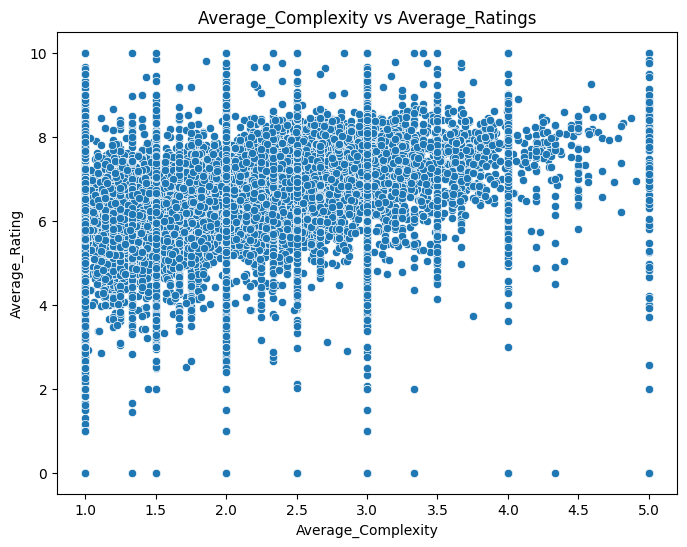

Correlation between Average Complexity Time and Average Rating: 0.36106999243085336


In [ ]:
#Plot of Average_Complexity and Average_Rating
plt.figure(figsize=(8, 6))
sns.scatterplot(data = df_cleaned, x = 'Average_Complexity', y = 'Average_Rating')
plt.title('Average_Complexity vs Average_Ratings')
plt.show()
play_time_rating_corr = pqc_data[['Average_Complexity', 'Average_Rating']].corr().iloc[0, 1]
print(f'Correlation between Average Complexity Time and Average Rating: {play_time_rating_corr}')


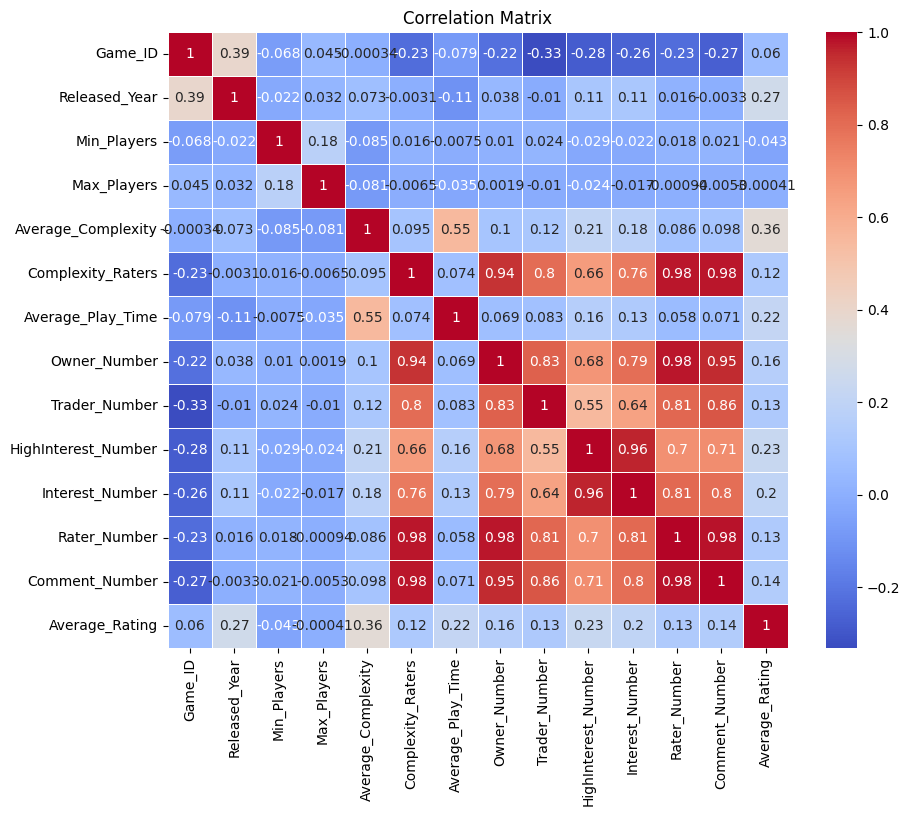

In [ ]:
#Correlation Matrix
numeric_columns = df_cleaned.select_dtypes(include=['float64' , 'int64'])

correlation_matrix = numeric_columns.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

<a id = "cell_modeling"></a>
## 3. Machine learning model development



###3.1 Loading the importing libraries

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

###3.2 Handling Missing Values


##### 3.2.1 Categorial Columns

In [ ]:
categorical_features = ['Game_Type', 'Age_Category']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

####3.2.2 Numerical Columns

In [ ]:
numerical_features = ['Released_Year', 'Min_Players', 'Max_Players', 'Average_Complexity',
                      'Complexity_Raters', 'Average_Play_Time', 'Owner_Number', 'Trader_Number',
                      'HighInterest_Number', 'Interest_Number', 'Rater_Number', 'Comment_Number']
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

3.3 Preprocessing of Data

In [ ]:
#Preprocessing and choosing target variabe
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])
#Dropping the Game_ID , Game_Name , Average_Rating columns , as they are not usefull features
pqc_data = pd.read_csv('/content/PQC_data.csv')
X = pqc_data.drop(['Game_ID', 'Game_Name', 'Average_Rating'], axis=1)
y = pqc_data['Average_Rating']


3.4 Spliting the data into test and train data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#Applying preprocessing to X_train and X_test
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

3.5 Training the Model

In [ ]:
#Importing Libraries
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
#Training the Models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42)
}

model_performance = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)


<a id = "cell_Evaluation"></a>
## 4. Model evaluation                                                                                                                       




In [ ]:
#Evaluting the models based on R2 score and MSE
#Selecting the best model based on R2 score ans mse
for name, model in models.items():
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  mse = mean_squared_error(y_test, y_pred)
  r2 = r2_score(y_test, y_pred)
  model_performance[name] = {'MSE': mse, 'R2': r2}
  print(f"{name} - MSE: {mse}, R2: {r2}")

Linear Regression - MSE: 2.0613175985463164, R2: 0.18242754542626816
Decision Tree - MSE: 1.508593411998514, R2: 0.40165240927880574
Random Forest - MSE: 0.738688667679316, R2: 0.7070167607231981
Gradient Boosting - MSE: 0.7613333871672298, R2: 0.6980352729078689


In [ ]:
best_model_name = max(model_performance, key=lambda x: model_performance[x]['R2'])
best_model = models[best_model_name]
print(f"Best model: {best_model_name}")

Best model: Random Forest


## 5. Competition (optional)





In [ ]:
import pandas as pd

In [ ]:
#read the the competition dataset
pqc_competition_data = pd.read_csv('/content/PQC_competion.csv')

In [ ]:
# Apply data transformation to the competition data,
# ensure number of features and transformation of X and X_competion are similar
pqc_competition_data.head()

,Game_ID,Game_Name,Released_Year,Game_Type,Age_Category,Min_Players,Max_Players,Average_Complexity,Complexity_Raters,Average_Play_Time,Owner_Number,Trader_Number,HighInterest_Number,Interest_Number,Rater_Number,Comment_Number
0,28162,Scene It? HBO,2005,BaseGame,12 to under 18,2,5,1.5000,2,30,55,6,1,0,22,7
1,65493,Star Wars: Imperial Assault Rebel Saboteurs A...,2015,PremiumGame,5 to under 12,2,5,2.8000,5,60,1532,4,67,177,122,32
2,7247,Glass Road,2013,BaseGame,12 to under 18,1,4,2.9167,300,75,4711,73,632,1857,3695,820
3,13822,California Gold,2015,BaseGame,5 to under 12,3,5,2.3333,6,120,103,2,18,44,49,29
4,19725,Zulu Attack,1982,BaseGame,12 to under 18,2,2,2.7500,4,90,59,2,3,5,20,11


In [ ]:
X_competition = pqc_competition_data.drop(columns=['Game_ID', 'Game_Name'])
# Select only the columns used during training
X_competition = X_competition[preprocessor.feature_names_in_]
X_competition = preprocessor.transform(X_competition)

In [ ]:
# Apply trained model to X_competition

# y_competition = model(X_compeition)
y_competition = best_model.predict(X_competition)


In [ ]:
# join unseen y_competition with predicted value into a data frame
inspection = pd.DataFrame({'Predicted':y_competition})

# join X_competition with the new dataframe
# Convert X_competition to a DataFrame before concatenation
X_competition_df = pd.DataFrame(X_competition)
inspection = pd.concat([X_competition_df, inspection], axis=1)

# Submit this results.csv file to join the competition
inspection.to_csv('Competition_pred.csv')
print('Completed')

Completed
